## Dataset Information

**Features:**

enrollee_id : Unique ID for candidate  
city: City code  
city_ development _index : Developement index of the city (scaled)  
gender: Gender of candidate  
relevent_experience: Relevant experience of candidate  
enrolled_university: Type of University course enrolled if any  
education_level: Education level of candidate  
major_discipline :Education major discipline of candidate  
experience: Candidate total experience in years  
company_size: No of employees in current employer's company  
company_type : Type of current employer  
last_new_job: Difference in years between previous job and current job  
training_hours: training hours completed  
**target: 0 – Not looking for job change, 1 – Looking for a job change**

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [151]:
job = pd.read_csv('/Users/huangzm/Desktop/Intro BA/project/aug_train.csv')
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## a. Data Exploration

### Summary Statistics

In [152]:
print(job.dtypes)
job.describe()

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [153]:
for i in ['city', 'gender','relevent_experience', 'enrolled_university', 'education_level',
          'major_discipline', 'experience', 'company_size', 'company_type','last_new_job', 'target']:
    print('Labels counts of '+i+' '+str(dict(job[i].value_counts())))
    print()

Labels counts of city {'city_103': 4355, 'city_21': 2702, 'city_16': 1533, 'city_114': 1336, 'city_160': 845, 'city_136': 586, 'city_67': 431, 'city_75': 305, 'city_102': 304, 'city_104': 301, 'city_73': 280, 'city_100': 275, 'city_71': 266, 'city_11': 247, 'city_61': 197, 'city_90': 197, 'city_28': 192, 'city_23': 182, 'city_65': 175, 'city_36': 160, 'city_173': 151, 'city_83': 143, 'city_50': 140, 'city_162': 128, 'city_116': 128, 'city_46': 128, 'city_138': 120, 'city_19': 119, 'city_64': 114, 'city_45': 113, 'city_74': 104, 'city_97': 104, 'city_57': 103, 'city_149': 102, 'city_99': 94, 'city_159': 94, 'city_128': 92, 'city_41': 89, 'city_10': 86, 'city_165': 82, 'city_98': 79, 'city_123': 79, 'city_105': 79, 'city_101': 75, 'city_40': 68, 'city_89': 67, 'city_150': 65, 'city_145': 63, 'city_24': 62, 'city_115': 54, 'city_142': 53, 'city_152': 51, 'city_76': 50, 'city_158': 49, 'city_13': 48, 'city_27': 47, 'city_91': 45, 'city_70': 44, 'city_134': 43, 'city_143': 41, 'city_77': 32

In [154]:
city = job.groupby( ["city"] ).city_development_index.mean()

In [155]:
index = np.array(job.groupby( ["city"] ).city_development_index.mean())
(unique, counts) = np.unique(index, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0.448,  1.   ],
       [ 0.479,  1.   ],
       [ 0.487,  1.   ],
       [ 0.493,  1.   ],
       [ 0.512,  1.   ],
       [ 0.516,  1.   ],
       [ 0.518,  1.   ],
       [ 0.527,  1.   ],
       [ 0.55 ,  1.   ],
       [ 0.555,  1.   ],
       [ 0.556,  1.   ],
       [ 0.558,  1.   ],
       [ 0.563,  1.   ],
       [ 0.579,  1.   ],
       [ 0.579,  1.   ],
       [ 0.624,  1.   ],
       [ 0.625,  1.   ],
       [ 0.64 ,  1.   ],
       [ 0.645,  1.   ],
       [ 0.647,  1.   ],
       [ 0.649,  1.   ],
       [ 0.664,  1.   ],
       [ 0.666,  1.   ],
       [ 0.68 ,  1.   ],
       [ 0.682,  1.   ],
       [ 0.689,  1.   ],
       [ 0.691,  1.   ],
       [ 0.693,  1.   ],
       [ 0.698,  1.   ],
       [ 0.698,  1.   ],
       [ 0.698,  5.   ],
       [ 0.698,  2.   ],
       [ 0.698, 10.   ],
       [ 0.701,  1.   ],
       [ 0.722,  1.   ],
       [ 0.725,  1.   ],
       [ 0.727,  1.   ],
       [ 0.73 ,  1.   ],
       [ 0.735,  1.   ],
       [ 0.738,  1.   ],


In [156]:
job.loc[job.city_development_index == 0.698]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
69,4830,city_90,0.698,NaN,No relevent experience,NaN,NaN,NaN,2,NaN,Pvt Ltd,never,228,1.0
88,29290,city_152,0.698,Male,No relevent experience,Full time course,Masters,STEM,11,NaN,Public Sector,2,42,0.0
117,21199,city_90,0.698,NaN,Has relevent experience,Full time course,Graduate,STEM,7,<10,NGO,1,90,0.0
140,22098,city_90,0.698,Female,No relevent experience,Full time course,Masters,STEM,5,NaN,NaN,4,21,1.0
166,3766,city_150,0.698,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Pvt Ltd,>4,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19036,20685,city_24,0.698,Male,No relevent experience,Full time course,High School,NaN,9,NaN,NaN,never,4,0.0
19045,33060,city_152,0.698,Female,No relevent experience,Part time course,Graduate,Other,3,10/49,Funded Startup,1,14,0.0
19048,21106,city_90,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,100-500,Pvt Ltd,1,20,0.0
19055,27422,city_70,0.698,Male,No relevent experience,Full time course,High School,NaN,8,1000-4999,Pvt Ltd,1,32,0.0


In [157]:
1 - 683/19158

0.9643490969829837

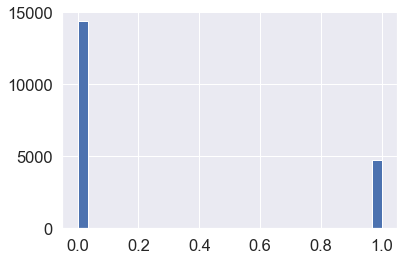

In [158]:
job['target'].hist(bins=30)

In [159]:
# function based on the code from:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

def group_bar(colname):
    g = job.groupby(colname)
    groups = [name for name,unused_df in g]
    target_0 = []
    target_1 = []
    for group in groups:
        group_0 = job.groupby(colname).target.value_counts()[group][0]
        target_0.append(group_0)
        group_1 = job.groupby(colname).target.value_counts()[group][1]
        target_1.append(group_1)
        
    x = np.arange(len(groups))
    width = 0.25

    fig, ax = plt.subplots(figsize=(7,5))
    rects1 = ax.bar(x - width/2, target_0, width, label='0')
    rects2 = ax.bar(x + width/2, target_1, width, label='1')
    
    ax.set_ylabel('Count',fontsize=13)
    ax.set_title('Count by '+ colname +' and target',fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(groups,rotation=45,fontsize=13)
    ax.legend()
    fig.tight_layout()

    plt.show()

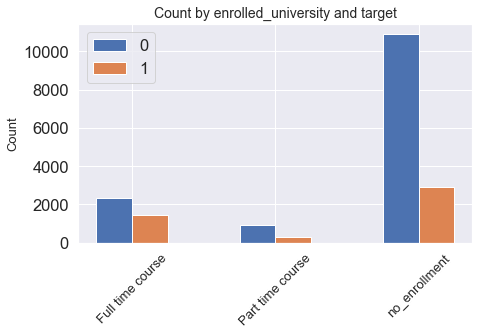

In [160]:
group_bar('enrolled_university')

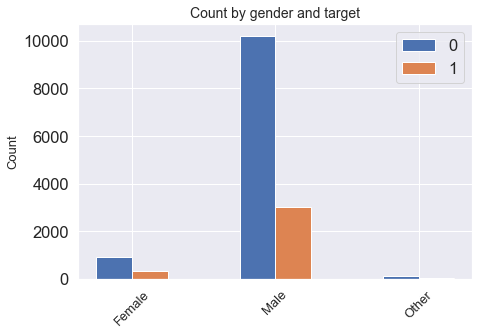

In [161]:
group_bar('gender')

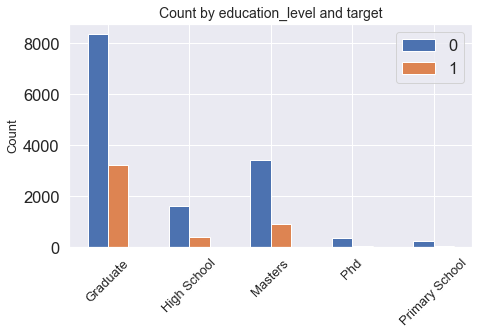

In [162]:
group_bar('education_level')

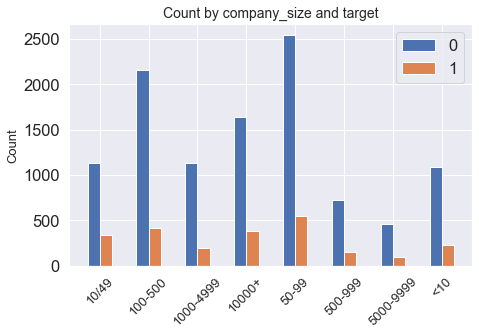

In [163]:
group_bar('company_size')

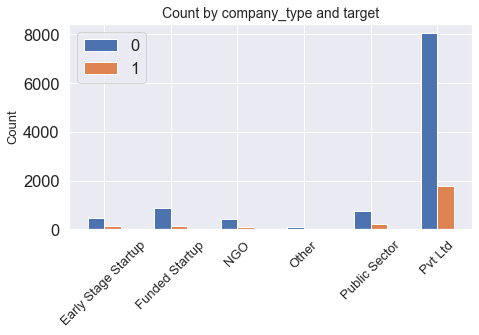

In [164]:
group_bar('company_type')

### Missing Value

In [165]:
job.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Correlation Matrix

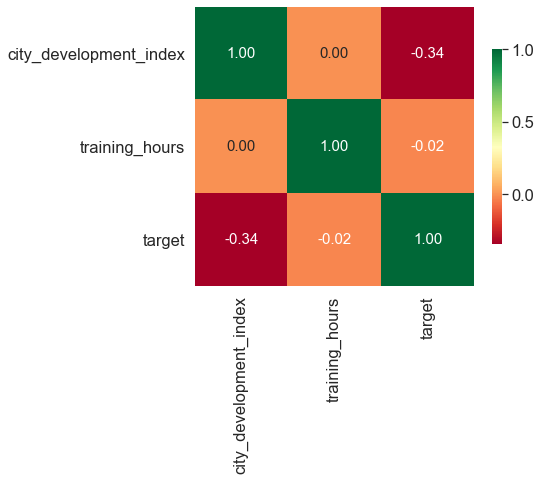

In [166]:
import seaborn as sns
cols = ['city_development_index','training_hours','target']
cm = np.corrcoef(job.loc[:,cols].values.T) 
plt.figure(figsize=(8,8)) 
sns.set(font_scale=1.5)
cols = ['city_development_index','training_hours','target']
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,       
                 fmt='.2f',annot_kws={'size': 15}, cbar_kws={"shrink": 0.5},cmap="RdYlGn",
                 yticklabels=cols, 
                 xticklabels=cols)
plt.tight_layout()
plt.show()

## b. Data Preparation

### Exclude Variables

In [167]:
if 'enrollee_id' in job.columns:
    job = job.drop(columns=['enrollee_id']) # exclude id column

if 'city' in job.columns:
    job = job.drop(columns=['city']) # exclude city column
    
job.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Transform Categorical Data

In [168]:
# map the ordinal categorical attributes
df = job.copy()

relevent_experience_mapping = {'Has relevent experience': 1, 'No relevent experience': 0}
df['relevent_experience'] = pd.to_numeric(df['relevent_experience'].map(relevent_experience_mapping))

enrolled_university_mapping = {'no_enrollment': 0, 'Full time course': 2, 'Part time course': 1}
df['enrolled_university'] = pd.to_numeric(df['enrolled_university'].map(enrolled_university_mapping))

education_level_mapping = {'Graduate': 2, 'Masters': 3, 'High School': 1, 'Phd': 4, 'Primary School': 0}
df['education_level'] = pd.to_numeric(df['education_level'].map(education_level_mapping))

experience_mapping = {'>20':25, '<1': 0}
df['experience'] = pd.to_numeric(df['experience'].map(experience_mapping))

company_size_mapping = {'50-99': 75, '100-500': 300, '10000+': 12500, '10/49': 30, 
           '1000-4999': 3000, '<10': 5, '500-999': 750, '5000-9999': 7500}
df['company_size'] = pd.to_numeric(df['company_size'].map(company_size_mapping))

last_new_job_mapping = {'1': 1, '>4': 7, '2': 2, 'never': 0, '4': 4, '3': 3}
df['last_new_job'] = pd.to_numeric(df['last_new_job'].map(last_new_job_mapping))

In [169]:
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,1,0.0,2.0,STEM,25.0,NaN,NaN,1.0,36,1.0
1,0.776,Male,0,0.0,2.0,STEM,NaN,75.0,Pvt Ltd,7.0,47,0.0
2,0.624,NaN,0,2.0,2.0,STEM,NaN,NaN,NaN,0.0,83,0.0
3,0.789,NaN,0,NaN,2.0,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,0.767,Male,1,0.0,3.0,STEM,25.0,75.0,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,0,0.0,2.0,Humanities,NaN,NaN,NaN,1.0,42,1.0
19154,0.920,Male,1,0.0,2.0,STEM,NaN,NaN,NaN,4.0,52,1.0
19155,0.920,Male,1,0.0,2.0,STEM,25.0,75.0,Pvt Ltd,4.0,44,0.0
19156,0.802,Male,1,0.0,1.0,NaN,0.0,750.0,Pvt Ltd,2.0,97,0.0


In [170]:
print(df.dtypes)

city_development_index    float64
gender                     object
relevent_experience         int64
enrolled_university       float64
education_level           float64
major_discipline           object
experience                float64
company_size              float64
company_type               object
last_new_job              float64
training_hours              int64
target                    float64
dtype: object


### Impute Missing Values

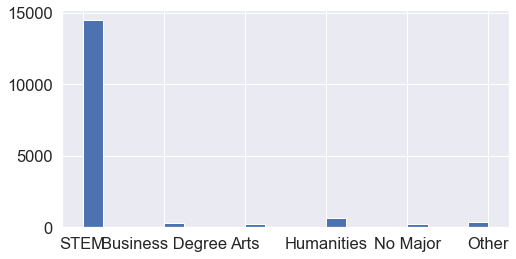

In [171]:
df['major_discipline'].hist(bins=20, figsize=(8,4))

In [172]:
# map non-ordinal categorical variables for kNN fitting
df1 = df.copy()

gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
df1['gender'] = pd.to_numeric(df1['gender'].map(gender_mapping))

major_discipline_mapping = {'STEM': 1, 'Humanities': 2, 'Other': 3, 'Business Degree': 4, 'Arts': 5, 'No Major': 6}
df1['major_discipline'] = pd.to_numeric(df1['major_discipline'].map(major_discipline_mapping))

company_type_mapping =  {'Pvt Ltd': 1, 'Funded Startup': 2, 'Public Sector': 3, 
                         'Early Stage Startup': 4, 'NGO': 5, 'Other': 6}
df1['company_type'] = pd.to_numeric(df1['company_type'].map(company_type_mapping))

In [173]:
df1

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.0,1,0.0,2.0,1.0,25.0,NaN,NaN,1.0,36,1.0
1,0.776,1.0,0,0.0,2.0,1.0,NaN,75.0,1.0,7.0,47,0.0
2,0.624,NaN,0,2.0,2.0,1.0,NaN,NaN,NaN,0.0,83,0.0
3,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,1.0,0.0,52,1.0
4,0.767,1.0,1,0.0,3.0,1.0,25.0,75.0,2.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1.0,0,0.0,2.0,2.0,NaN,NaN,NaN,1.0,42,1.0
19154,0.920,1.0,1,0.0,2.0,1.0,NaN,NaN,NaN,4.0,52,1.0
19155,0.920,1.0,1,0.0,2.0,1.0,25.0,75.0,1.0,4.0,44,0.0
19156,0.802,1.0,1,0.0,1.0,NaN,0.0,750.0,1.0,2.0,97,0.0


In [174]:
# fit a 5NN to fill NAs
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

np.seterr(divide='ignore', invalid='ignore')
scaler = StandardScaler()
scaler.fit(df1)
data= scaler.transform(df1)

imputer = KNNImputer(n_neighbors=5, weights='distance')
imputer.fit_transform(data)
df1[:]= imputer.transform(data)
df1[:]= scaler.inverse_transform(df1[:], copy=None)

In [175]:
df1

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.000000,1.0,0.000000,2.0,1.000000,2.500000e+01,75.000000,1.000000,1.0,36.0,1.0
1,0.776,1.000000,0.0,0.000000,2.0,1.000000,2.500000e+01,75.000000,1.000000,7.0,47.0,0.0
2,0.624,1.000000,0.0,2.000000,2.0,1.000000,3.552714e-15,138.235834,2.504133,0.0,83.0,0.0
3,0.789,1.187021,0.0,0.244095,2.0,4.000000,0.000000e+00,2395.199821,1.000000,0.0,52.0,1.0
4,0.767,1.000000,1.0,0.000000,3.0,1.000000,2.500000e+01,75.000000,2.000000,4.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1.000000,0.0,0.000000,2.0,2.000000,1.987349e+01,2170.210677,1.491244,1.0,42.0,1.0
19154,0.920,1.000000,1.0,0.000000,2.0,1.000000,2.500000e+01,2379.997110,1.000000,4.0,52.0,1.0
19155,0.920,1.000000,1.0,0.000000,2.0,1.000000,2.500000e+01,75.000000,1.000000,4.0,44.0,0.0
19156,0.802,1.000000,1.0,0.000000,1.0,1.595260,0.000000e+00,750.000000,1.000000,2.0,97.0,0.0


In [176]:
# unmap the categorical variables
df1['gender']=np.round(df1['gender'])
df1['major_discipline']=np.round(df1['major_discipline'])
df1['company_type']=np.round(df1['company_type'])

inv_gender_mapping = {v: k for k, v in gender_mapping.items()}
df1['gender']=df1['gender'].map(inv_gender_mapping)

inv_major_discipline_mapping = {v: k for k, v in major_discipline_mapping.items()}
df1['major_discipline']=df1['major_discipline'].map(inv_major_discipline_mapping)

inv_company_type_mapping = {v: k for k, v in company_type_mapping.items()}
df1['company_type']=df1['company_type'].map(inv_company_type_mapping)

In [177]:
df1

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,1.0,0.000000,2.0,STEM,2.500000e+01,75.000000,Pvt Ltd,1.0,36.0,1.0
1,0.776,Male,0.0,0.000000,2.0,STEM,2.500000e+01,75.000000,Pvt Ltd,7.0,47.0,0.0
2,0.624,Male,0.0,2.000000,2.0,STEM,3.552714e-15,138.235834,Public Sector,0.0,83.0,0.0
3,0.789,Male,0.0,0.244095,2.0,Business Degree,0.000000e+00,2395.199821,Pvt Ltd,0.0,52.0,1.0
4,0.767,Male,1.0,0.000000,3.0,STEM,2.500000e+01,75.000000,Funded Startup,4.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,0.0,0.000000,2.0,Humanities,1.987349e+01,2170.210677,Pvt Ltd,1.0,42.0,1.0
19154,0.920,Male,1.0,0.000000,2.0,STEM,2.500000e+01,2379.997110,Pvt Ltd,4.0,52.0,1.0
19155,0.920,Male,1.0,0.000000,2.0,STEM,2.500000e+01,75.000000,Pvt Ltd,4.0,44.0,0.0
19156,0.802,Male,1.0,0.000000,1.0,Humanities,0.000000e+00,750.000000,Pvt Ltd,2.0,97.0,0.0


In [178]:
# check if NA is all replaced
df1.isna().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [179]:
# create dummy variables for the three categorical variables
df1 = pd.get_dummies(df1, drop_first=True)
df1

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,1.0,0.000000,2.0,2.500000e+01,75.000000,1.0,36.0,1.0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.776,0.0,0.000000,2.0,2.500000e+01,75.000000,7.0,47.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
2,0.624,0.0,2.000000,2.0,3.552714e-15,138.235834,0.0,83.0,0.0,1,...,0,0,0,0,1,0,0,0,1,0
3,0.789,0.0,0.244095,2.0,0.000000e+00,2395.199821,0.0,52.0,1.0,1,...,1,0,0,0,0,0,0,0,0,1
4,0.767,1.0,0.000000,3.0,2.500000e+01,75.000000,4.0,8.0,0.0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0.0,0.000000,2.0,1.987349e+01,2170.210677,1.0,42.0,1.0,1,...,0,1,0,0,0,0,0,0,0,1
19154,0.920,1.0,0.000000,2.0,2.500000e+01,2379.997110,4.0,52.0,1.0,1,...,0,0,0,0,1,0,0,0,0,1
19155,0.920,1.0,0.000000,2.0,2.500000e+01,75.000000,4.0,44.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
19156,0.802,1.0,0.000000,1.0,0.000000e+00,750.000000,2.0,97.0,0.0,1,...,0,1,0,0,0,0,0,0,0,1


In [180]:
# round the kNN predictions so that they fall into one numeric category
# so we can map them back when needed
categorical = ['relevent_experience','enrolled_university','education_level',
              'experience','company_size','last_new_job']
df1.loc[:,categorical] = np.round(df1.loc[:,categorical])

dummy = ['gender_Male', 'gender_Other',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd']
df1.loc[:,dummy] = np.round(df1.loc[:,dummy])

In [181]:
# modify other kNN predictions so that they fall into one numeric category
# so we can map them back when needed
df1.loc[df1['experience']>20, 'experience'] = 25

df1.loc[df1['company_size']<10, 'company_size'] = 5
df1.loc[(df1['company_size']<50) & (df1['company_size']>10), 'company_size'] = 30
df1.loc[(df1['company_size']<100) & (df1['company_size']>50), 'company_size'] = 75
df1.loc[(df1['company_size']<500) & (df1['company_size']>100), 'company_size'] = 300
df1.loc[(df1['company_size']<1000) & (df1['company_size']>500), 'company_size'] = 750
df1.loc[(df1['company_size']<5000) & (df1['company_size']>1000), 'company_size'] = 3000
df1.loc[(df1['company_size']<10000) & (df1['company_size']>5000), 'company_size'] = 7500
df1.loc[df1['company_size']>10000, 'company_size'] = 12500

df1.loc[df1['last_new_job']>4, 'last_new_job'] = 7

In [182]:
df1

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,1.0,0.0,2.0,25.0,75.0,1.0,36.0,1.0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.776,0.0,0.0,2.0,25.0,75.0,7.0,47.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
2,0.624,0.0,2.0,2.0,0.0,300.0,0.0,83.0,0.0,1,...,0,0,0,0,1,0,0,0,1,0
3,0.789,0.0,0.0,2.0,0.0,3000.0,0.0,52.0,1.0,1,...,1,0,0,0,0,0,0,0,0,1
4,0.767,1.0,0.0,3.0,25.0,75.0,4.0,8.0,0.0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0.0,0.0,2.0,20.0,3000.0,1.0,42.0,1.0,1,...,0,1,0,0,0,0,0,0,0,1
19154,0.920,1.0,0.0,2.0,25.0,3000.0,4.0,52.0,1.0,1,...,0,0,0,0,1,0,0,0,0,1
19155,0.920,1.0,0.0,2.0,25.0,75.0,4.0,44.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
19156,0.802,1.0,0.0,1.0,0.0,750.0,2.0,97.0,0.0,1,...,0,1,0,0,0,0,0,0,0,1


In [183]:
# check if all the number falls into some category
for i in categorical + dummy:
    print('Labels counts of '+i+' '+str(dict(df1[i].value_counts())))
    print()

Labels counts of relevent_experience {1.0: 13792, 0.0: 5366}

Labels counts of enrolled_university {0.0: 13985, 2.0: 3824, 1.0: 1349}

Labels counts of education_level {2.0: 11891, 3.0: 4405, 1.0: 2117, 4.0: 416, 0.0: 329}

Labels counts of experience {25.0: 11458, 0.0: 2925, 20.0: 498, 4.0: 422, 5.0: 408, 10.0: 275, 15.0: 273, 19.0: 238, 3.0: 233, 11.0: 233, 9.0: 226, 6.0: 221, 18.0: 214, 14.0: 213, 17.0: 211, 16.0: 206, 13.0: 180, 8.0: 172, 7.0: 172, 12.0: 166, 2.0: 147, 1.0: 67}

Labels counts of company_size {3000.0: 3933, 75.0: 3493, 300.0: 3471, 12500.0: 2142, 30.0: 1753, 750.0: 1592, 7500.0: 1404, 5.0: 1358, 50.0: 6, 100.0: 3, 10000.0: 2, 5000.0: 1}

Labels counts of last_new_job {1.0: 8208, 7.0: 3321, 2.0: 2979, 0.0: 2528, 3.0: 1068, 4.0: 1054}

Labels counts of gender_Male {1: 17470, 0: 1688}

Labels counts of gender_Other {0: 18960, 1: 198}

Labels counts of major_discipline_Business Degree {0: 18825, 1: 333}

Labels counts of major_discipline_Humanities {0: 17752, 1: 1406}



### Balancing Dateset

In [184]:
print('Labels counts of target: '+str(dict(df1['target'].value_counts())))

Labels counts of target: {0.0: 14381, 1.0: 4777}


In [185]:
from sklearn.utils import resample

df1_majority = df1[df1.target==0]
df1_minority = df1[df1.target==1]

df1_majority_downsampled = resample(df1_majority, replace=False, n_samples=4777, random_state=42) 

df1_downsampled = pd.concat([df1_majority_downsampled, df1_minority])
df1_downsampled.target.value_counts()

1.0    4777
0.0    4777
Name: target, dtype: int64

### Sampling

In [186]:
df1_sampled = resample(df1_downsampled, replace=False, n_samples=5000, random_state=42) 

In [187]:
print('dataset size: '+ str(df1_sampled.shape))
print()
print('target class count: ' + str(dict(df1_sampled['target'].value_counts())))

dataset size: (5000, 21)

target class count: {0.0: 2531, 1.0: 2469}


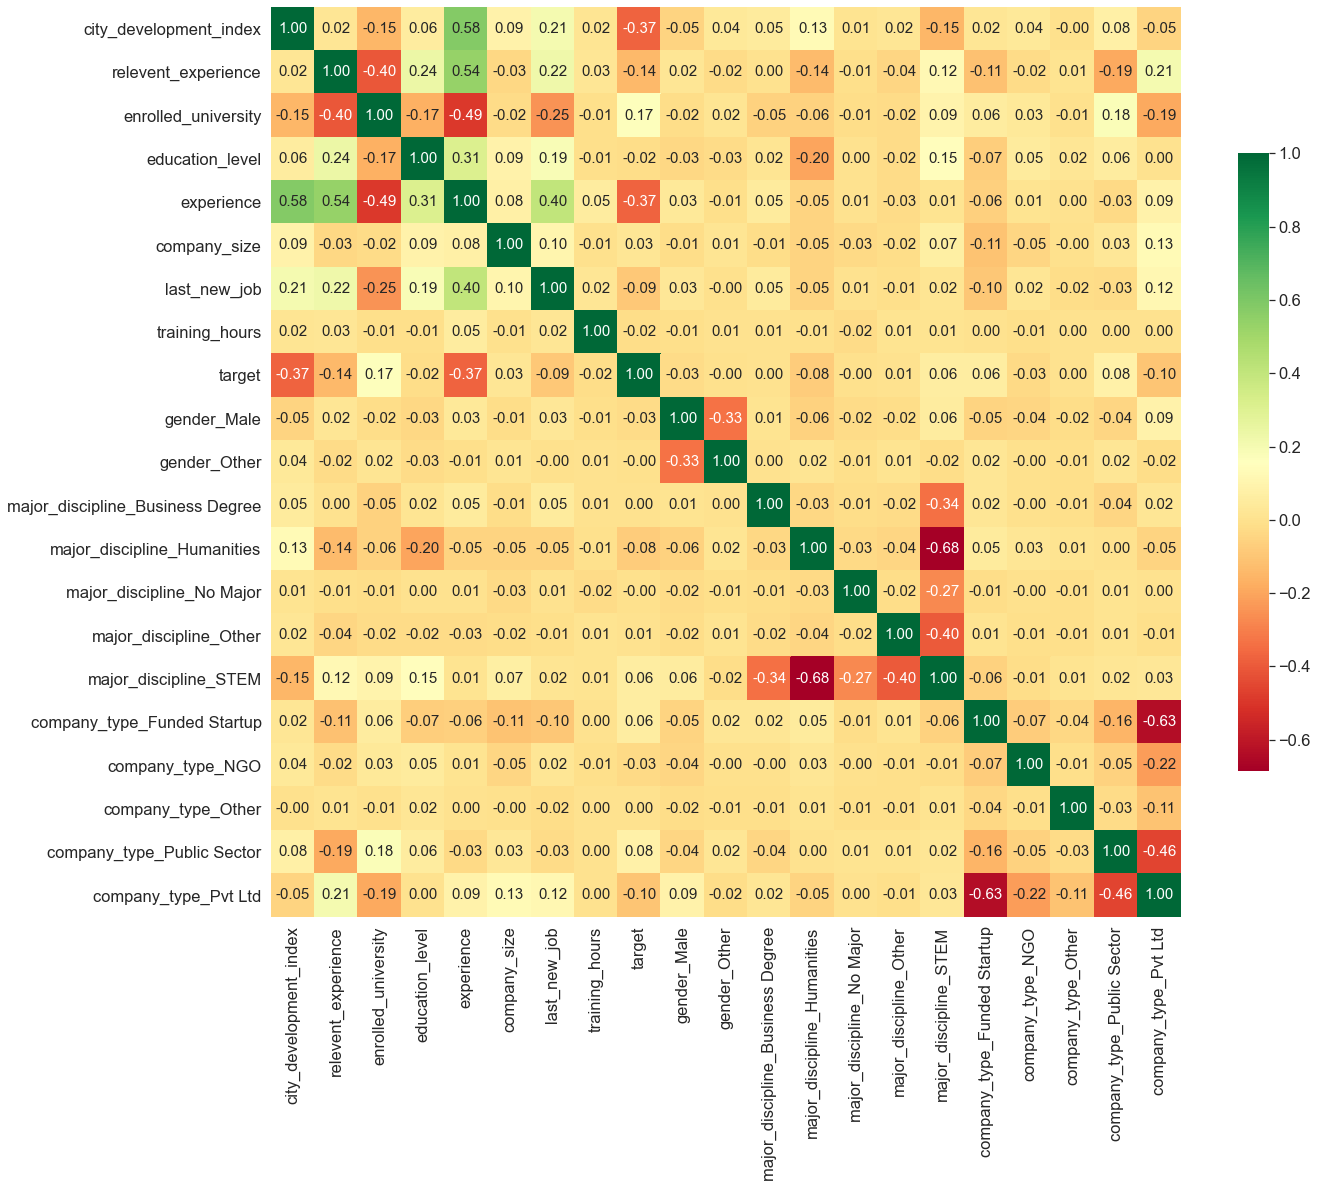

In [188]:
cm = np.corrcoef(df1_sampled.values.T) 
plt.figure(figsize=(20,20)) 
sns.set(font_scale=1.5)
cols = ['city_development_index','training_hours','target']
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,       
                 fmt='.2f',annot_kws={'size': 15}, cbar_kws={"shrink": 0.5},cmap="RdYlGn",
                 yticklabels=df1_sampled.columns, 
                 xticklabels=df1_sampled.columns)
plt.tight_layout()
plt.show()

## c. Modelling

In [189]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
outer_cv = KFold(n_splits=5, shuffle=True,random_state = 42)
inner_cv = KFold(n_splits=5, shuffle=True,random_state = 42)

In [190]:
X = df1_sampled.drop(columns=['target'])
y = df1_sampled.loc[:,'target']

### 1. Simple Model

In [191]:
def do_cv(model,X,y,cv,list_scoring):
    for scoring in list_scoring:
        score = cross_val_score(model, X=X, y=y, cv=outer_cv, scoring=scoring)
        print("CV "+scoring+": ",round(score.mean(),5), " +/- ", round(score.std(),5))

In [192]:
# desision tree

from sklearn.tree import DecisionTreeClassifier

dt0 = DecisionTreeClassifier(random_state=42)
do_cv(dt0,X,y,inner_cv,['precision','recall'])

CV precision:  0.68169  +/-  0.01559
CV recall:  0.71023  +/-  0.01679


In [193]:
# knn

from sklearn import neighbors
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

knn0 = neighbors.KNeighborsClassifier(n_neighbors=5)
do_cv(knn0,X,y,inner_cv,['precision','recall'])

CV precision:  0.6486  +/-  0.01339
CV recall:  0.63224  +/-  0.01729


In [194]:
# logistics

from sklearn.linear_model import LogisticRegression 
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

lr0 = LogisticRegression(random_state=42)
do_cv(lr0,X,y,inner_cv,['precision','recall'])

CV precision:  0.70667  +/-  0.00416
CV recall:  0.60811  +/-  0.02178


### Feature Engineering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ffe40610>,
      dtype=object)

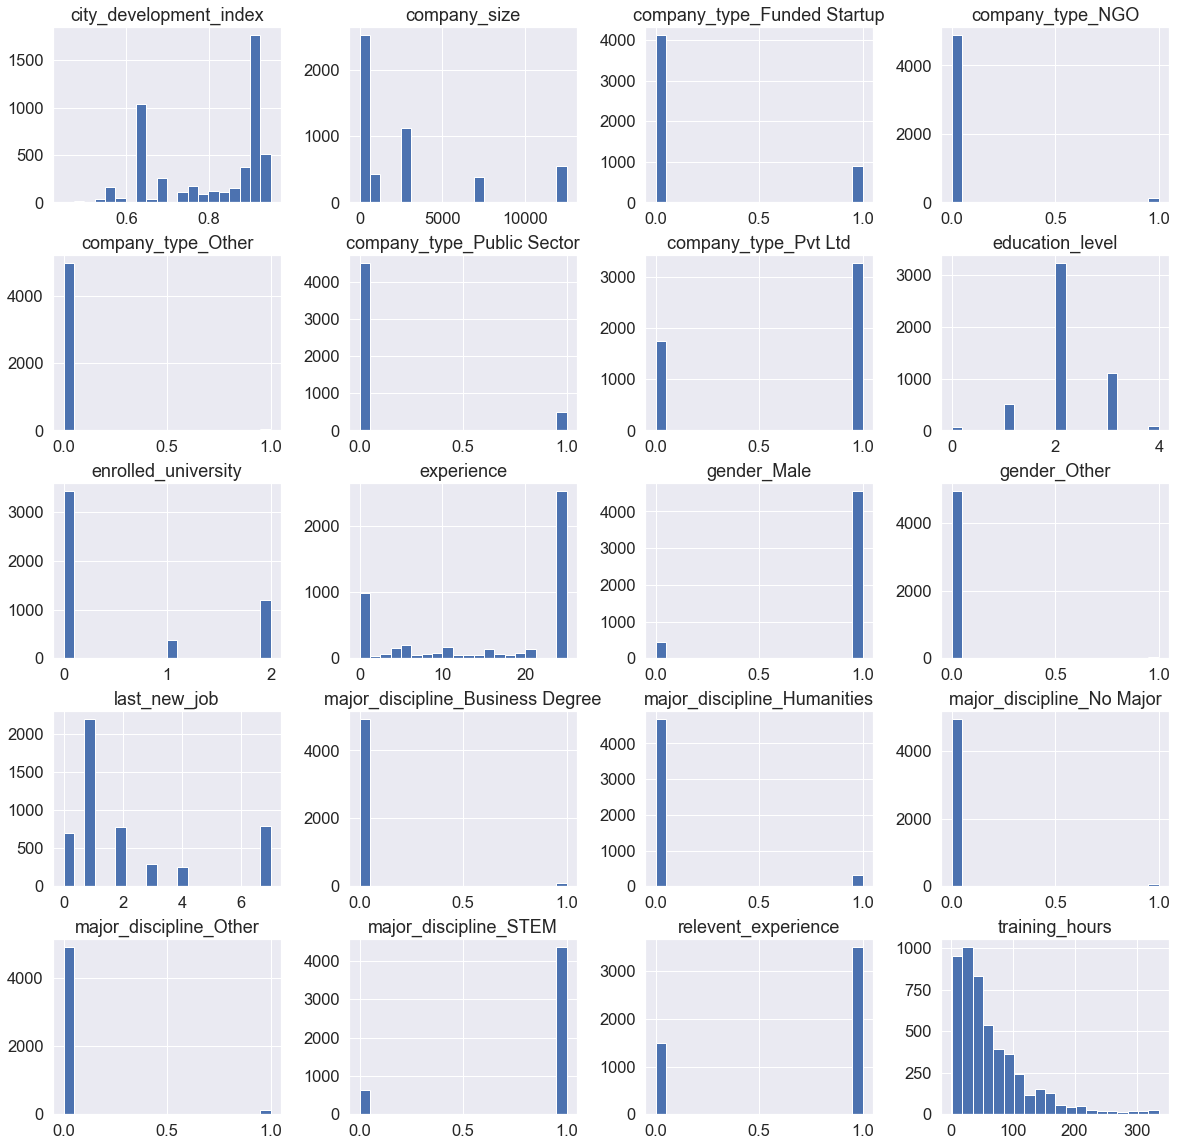

In [195]:
X.hist(bins=20, figsize=(20, 20))

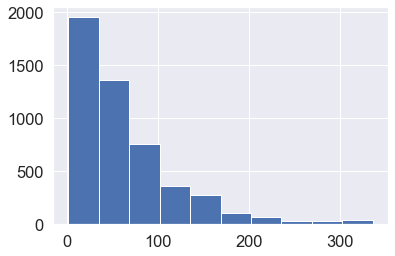

In [196]:
X['training_hours'].hist()

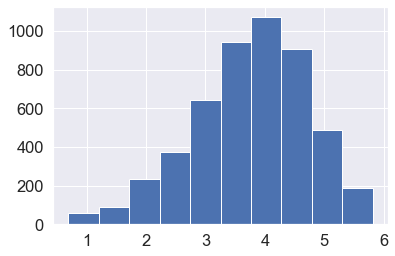

In [197]:
np.log(X['training_hours']).hist()

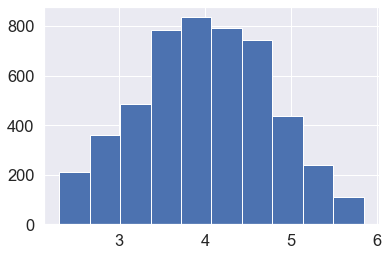

In [198]:
np.log(X['training_hours']+8).hist()

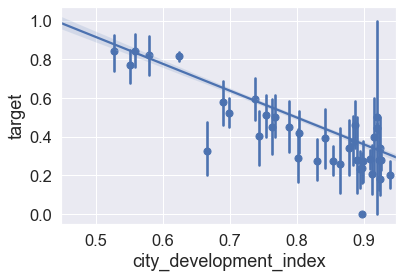

In [199]:
# check if there's non-linear relationship
import seaborn as sns
sns.regplot(X['city_development_index'], y, x_bins=100)

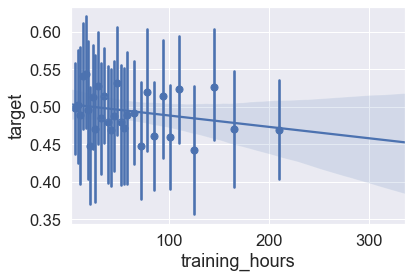

In [200]:
sns.regplot(X['training_hours'], y, x_bins=30)

In [201]:
'''
create five new features:

'last_new_job_proportion'
'city_development_index^2'
'city_development_index^3'
'training_hours^2'
'training_hours^3'
'''

X_fe = X.copy()
X_fe['last_new_job_proportion'] = X_fe['last_new_job']/(X_fe['experience']+0.00000000001)
X_fe['training_hours'] = np.log(X['training_hours']+8)
X_fe['city_development_index^2'] = X_fe['city_development_index']**2
X_fe['training_hours^2'] = X_fe['training_hours']**2
X_fe['city_development_index^3'] = X_fe['city_development_index']**3
X_fe['training_hours^3'] = X_fe['training_hours']**3

In [202]:
X_fe

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,gender_Male,gender_Other,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_proportion,city_development_index^2,training_hours^2,city_development_index^3,training_hours^3
5110,0.897,0.0,1.0,2.0,9.0,3000.0,2.0,3.871201,1,0,...,0,0,0,0,1,2.222222e-01,0.804609,14.986197,0.721734,58.014582
9551,0.804,0.0,0.0,2.0,4.0,3000.0,1.0,3.526361,1,0,...,0,0,0,0,1,2.500000e-01,0.646416,12.435219,0.519718,43.851064
18004,0.920,1.0,0.0,2.0,25.0,12500.0,2.0,4.867534,1,0,...,0,0,1,0,0,8.000000e-02,0.846400,23.692892,0.778688,115.325966
12686,0.939,0.0,0.0,2.0,25.0,3000.0,0.0,4.077537,1,0,...,0,0,0,1,0,0.000000e+00,0.881721,16.626312,0.827936,67.794408
11095,0.910,1.0,0.0,2.0,25.0,12500.0,1.0,3.258097,1,0,...,0,0,0,1,0,4.000000e-02,0.828100,10.615193,0.753571,34.585324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,0.624,1.0,2.0,2.0,0.0,5.0,0.0,3.828641,1,0,...,0,0,0,0,0,0.000000e+00,0.389376,14.658495,0.242971,56.122121
14638,0.920,0.0,2.0,2.0,11.0,75.0,1.0,3.850148,1,0,...,0,1,0,0,0,9.090909e-02,0.846400,14.823637,0.778688,57.073189
1599,0.923,1.0,0.0,2.0,25.0,3000.0,2.0,4.158883,0,0,...,0,0,0,0,1,8.000000e-02,0.851929,17.296309,0.786330,71.933325
3082,0.698,0.0,2.0,1.0,-0.0,5.0,0.0,3.931826,1,0,...,0,0,0,0,0,0.000000e+00,0.487204,15.459253,0.340068,60.783086


In [203]:
# tree
dt0 = DecisionTreeClassifier(random_state=42)
do_cv(dt0,X,y,inner_cv,['precision','recall'])
print()
do_cv(dt0,X_fe,y,inner_cv,['precision','recall'])

CV precision:  0.68169  +/-  0.01559
CV recall:  0.71023  +/-  0.01679

CV precision:  0.68673  +/-  0.00906
CV recall:  0.69823  +/-  0.02775


In [216]:
# all the new features are in top 10 important features for dt
dt0.fit(X_fe,y)
pd.DataFrame(dt0.feature_importances_,
             index=X_fe.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
city_development_index^2,0.183891
company_size,0.094833
training_hours,0.086666
training_hours^2,0.086345
training_hours^3,0.083894
experience,0.081274
last_new_job_proportion,0.069307
education_level,0.053316
city_development_index,0.040008
company_type_Pvt Ltd,0.036562


In [205]:
# knn (huge improvement after feature engineering)
scaler = StandardScaler()
scaler.fit(X_fe)
X_std_fe = scaler.transform(X_fe)

knn0 = neighbors.KNeighborsClassifier(n_neighbors=5)
do_cv(knn0,X,y,inner_cv,['precision','recall'])
print()
do_cv(knn0,X_std_fe,y,inner_cv,['precision','recall'])

CV precision:  0.6486  +/-  0.01339
CV recall:  0.63224  +/-  0.01729

CV precision:  0.70975  +/-  0.0199
CV recall:  0.67715  +/-  0.00906


In [50]:
# logistics
simplefilter("ignore", category=ConvergenceWarning)

lr0 = LogisticRegression(random_state=42)
do_cv(lr0,X,y,inner_cv,['precision','recall'])
print()
do_cv(lr0,X_fe,y,inner_cv,['precision','recall'])

CV precision:  0.70667  +/-  0.00416
CV recall:  0.60811  +/-  0.02178

CV precision:  0.48447  +/-  0.0091
CV recall:  0.87037  +/-  0.06411


In [51]:
#  city_development_index^3, city_development_index^2 created are important features for lr
lr0.fit(X_std_fe,y)
pd.DataFrame(np.abs(lr0.coef_),
             columns=X_fe.columns,index=['Feature Importance']).sort_values('Feature Importance',axis=1,ascending=False)

,city_development_index,city_development_index^3,experience,city_development_index^2,company_type_Public Sector,last_new_job,company_size,major_discipline_Humanities,training_hours^3,education_level,...,training_hours,major_discipline_Business Degree,last_new_job_proportion,major_discipline_STEM,relevent_experience,gender_Other,major_discipline_Other,company_type_Other,major_discipline_No Major,enrolled_university
Feature Importance,1.90001,1.699059,0.640491,0.35445,0.17088,0.152219,0.146007,0.14311,0.142286,0.132492,...,0.053121,0.048041,0.039973,0.026623,0.023755,0.006383,0.005225,0.002974,0.001204,0.001103


## Parameter Tuning

### Tree

In [259]:
gs_dt_precsion = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': list(np.arange(3,15,1)),
                               'max_leaf_nodes':list(np.arange(10,20,1)),
                               'min_impurity_decrease': list(np.arange(0.,0.01,0.003)),
                               'criterion':['gini','entropy']}],
                  scoring='precision', 
                  cv=inner_cv,
                  n_jobs=4)

gs_dt_precsion = gs_dt_precsion.fit(X_fe,y)

print("Non-nested CV Accuracy: ", gs_dt_precsion.best_score_)
print("Optimal Parameter: ", gs_dt_precsion.best_params_)
print("Optimal Estimator: ", gs_dt_precsion.best_estimator_)
print()
nested_score_gs_dt_precsion = cross_val_score(gs_dt_precsion, X=X_fe, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_dt_precsion.mean(), " +/- ", nested_score_gs_dt_precsion.std())

Non-nested CV Accuracy:  0.764164250623831
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 16, 'min_impurity_decrease': 0.0}
Optimal Estimator:  DecisionTreeClassifier(max_depth=9, max_leaf_nodes=16, random_state=42)

Nested CV Accuracy:  0.7590665904299756  +/-  0.016333416557607103


In [267]:
gs_dt_precsion.best_estimator_.fit(X_fe,y)
pd.DataFrame(gs_dt_precsion.best_estimator_.feature_importances_,
             index=X_fe.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)[:9]

,Feature Importance
city_development_index^2,0.512121
experience,0.189905
company_type_Pvt Ltd,0.071479
education_level,0.065967
company_size,0.060662
last_new_job_proportion,0.046531
city_development_index^3,0.031301
relevent_experience,0.022033
city_development_index,0.000000


In [260]:
gs_dt_recall = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': list(np.arange(3,15,1)),
                               'max_leaf_nodes':list(np.arange(10,20,1)),
                               'min_impurity_decrease': list(np.arange(0.,0.01,0.003)),
                               'criterion':['gini','entropy']}],
                  scoring='recall', 
                  cv=inner_cv,
                  n_jobs=4)

gs_dt_recall = gs_dt_recall.fit(X_fe,y)

print("Non-nested CV Accuracy: ", gs_dt_recall.best_score_)
print("Optimal Parameter: ", gs_dt_recall.best_params_)
print("Optimal Estimator: ", gs_dt_recall.best_estimator_)
print()
nested_score_gs_dt_recall = cross_val_score(gs_dt_recall, X=X_fe, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_dt_recall.mean(), " +/- ", nested_score_gs_dt_recall.std())

Non-nested CV Accuracy:  0.7384109830640433
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 11, 'min_impurity_decrease': 0.0}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=11,
                       random_state=42)

Nested CV Accuracy:  0.7302058706056674  +/-  0.03282157023247051


In [268]:
gs_dt_recall.best_estimator_.fit(X_fe,y)
pd.DataFrame(gs_dt_recall.best_estimator_.feature_importances_,
             index=X_fe.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)[:9]

,Feature Importance
city_development_index^2,0.543119
experience,0.196692
company_size,0.071372
company_type_Pvt Ltd,0.051136
education_level,0.046675
last_new_job_proportion,0.045345
city_development_index,0.034701
training_hours,0.010960
company_type_Funded Startup,0.000000


### kNN

In [262]:
gs_knn_precsion = GridSearchCV(estimator=neighbors.KNeighborsClassifier(),
                  param_grid=[{'n_neighbors': list(np.arange(1,20,1)),
                               'weights': ['uniform', 'distance'],
                               'p': [1,2]}],
                  scoring='precision', 
                  cv=inner_cv,
                  n_jobs=4)

gs_knn_precsion = gs_knn_precsion.fit(X_std_fe,y)

print("Non-nested CV Accuracy: ", gs_knn_precsion.best_score_)
print("Optimal Parameter: ", gs_knn_precsion.best_params_)
print("Optimal Estimator: ", gs_knn_precsion.best_estimator_)
print()
nested_score_gs_knn_precsion = cross_val_score(gs_knn_precsion, X=X_std_fe, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn_precsion.mean(), " +/- ", nested_score_gs_knn_precsion.std())

Non-nested CV Accuracy:  0.7814875620116775
Optimal Parameter:  {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=2)

Nested CV Accuracy:  0.776236006875027  +/-  0.009717703713739626


In [52]:
gs_knn_recall = GridSearchCV(estimator=neighbors.KNeighborsClassifier(),
                  param_grid=[{'n_neighbors': list(np.arange(1,20,1)),
                               'weights': ['uniform', 'distance'],
                               'p': [1,2]}],
                  scoring='recall', 
                  cv=inner_cv,
                  n_jobs=4)

gs_knn_recall = gs_knn_recall.fit(X_std_fe,y)

print("Non-nested CV Accuracy: ", gs_knn_recall.best_score_)
print("Optimal Parameter: ", gs_knn_recall.best_params_)
print("Optimal Estimator: ", gs_knn_recall.best_estimator_)
print()
nested_score_gs_knn_recall = cross_val_score(gs_knn_recall, X=X_std_fe, y=y, cv=outer_cv)
print("Nested CV Accuracy: ",nested_score_gs_knn_recall.mean(), " +/- ", nested_score_gs_knn_recall.std())

Non-nested CV Accuracy:  0.7136892718411609
Optimal Parameter:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

Nested CV Accuracy:  0.7080794876719174  +/-  0.015821053047411385


### Logistics

In [53]:
gs_lr_precision = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': list(np.arange(0,0.2,0.02)),
                               'penalty':['l1','l2'],
                               'fit_intercept':['True','False']}],
                  scoring='precision',
                  cv=inner_cv,
                  n_jobs=4)

gs_lr_precision = gs_lr_precision.fit(X,y.ravel())

print("Non-nested CV Accuracy: ", gs_lr_precision.best_score_)
print("Optimal Parameter: ", gs_lr_precision.best_params_)
print("Optimal Estimator: ", gs_lr_precision.best_estimator_)
print()
nested_score_gs_lr_precision = cross_val_score(gs_lr_precision, X=X, y=y.ravel(), cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr_precision.mean(), " +/- ", nested_score_gs_lr_precision.std())

Non-nested CV Accuracy:  0.7243587304072634
Optimal Parameter:  {'C': 0.12, 'fit_intercept': 'True', 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.12, fit_intercept='True', penalty='l1', random_state=42,
                   solver='liblinear')

Nested CV Accuracy: 0.7216107091404285  +/-  0.01277904138838929


In [56]:
gs_lr_precision.best_estimator_.fit(X_std_fe,y)
pd.DataFrame(np.abs(gs_lr_precision.best_estimator_.coef_),
             columns=X_fe.columns,index=['Feature Importance']).sort_values('Feature Importance',axis=1,ascending=False).transpose()[:9]

,Feature Importance
city_development_index,1.204196
city_development_index^3,0.657454
experience,0.623976
company_type_Public Sector,0.159260
last_new_job,0.146730
company_size,0.142929
company_type_Pvt Ltd,0.127659
education_level,0.125659
major_discipline_Humanities,0.119491


In [54]:
gs_lr_recall = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                  param_grid=[{'C': list(np.arange(0,0.2,0.02)),
                               'penalty':['l1','l2'],
                               'fit_intercept':['True','False']}],
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_lr_recall = gs_lr_recall.fit(X,y.ravel())

print("Non-nested CV Accuracy: ", gs_lr_recall.best_score_)
print("Optimal Parameter: ", gs_lr_recall.best_params_)
print("Optimal Estimator: ", gs_lr_recall.best_estimator_)
print()
nested_score_gs_lr_recall = cross_val_score(gs_lr_recall, X=X, y=y.ravel(), cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr_recall.mean(), " +/- ", nested_score_gs_lr_recall.std())

Non-nested CV Accuracy:  0.6332437509269659
Optimal Parameter:  {'C': 0.18, 'fit_intercept': 'True', 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.18, fit_intercept='True', penalty='l1', random_state=42,
                   solver='liblinear')

Nested CV Accuracy: 0.63206958262951  +/-  0.020075927695222595


In [58]:
gs_lr_recall.best_estimator_.fit(X_std_fe,y)
pd.DataFrame(np.abs(gs_lr_recall.best_estimator_.coef_),
             columns=X_fe.columns,index=['Feature Importance']).sort_values('Feature Importance',axis=1,ascending=False).transpose()[:9]

,Feature Importance
city_development_index,1.204196
city_development_index^3,0.657454
experience,0.623976
company_type_Public Sector,0.159260
last_new_job,0.146730
company_size,0.142929
company_type_Pvt Ltd,0.127659
education_level,0.125659
major_discipline_Humanities,0.119491


## Evaluation

In [61]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report, auc,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score,learning_curve, ShuffleSplit, StratifiedKFold, validation_curve, GridSearchCV

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_fe, y, test_size=0.20, random_state=42)
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std_fe, y, test_size=0.2, random_state=42)

In [64]:
# get all best models

clf_dt_precision = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=16, random_state=42)
clf_dt_recall = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=11, random_state=42)

clf_kNN_precision = neighbors.KNeighborsClassifier(n_neighbors=2)
clf_kNN_recall = neighbors.KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

clf_lr_precision = LogisticRegression(C=0.12, fit_intercept='True', penalty='l1', random_state=42, solver='liblinear')
clf_lr_recall = LogisticRegression(C=0.18, fit_intercept='True', penalty='l1', random_state=42,
                   solver='liblinear')

In [75]:
# plot some ROC

def plot_ROC_curve(clf, label, clr, ls, X_train, X_test, y_train, y_test):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))
    return plt

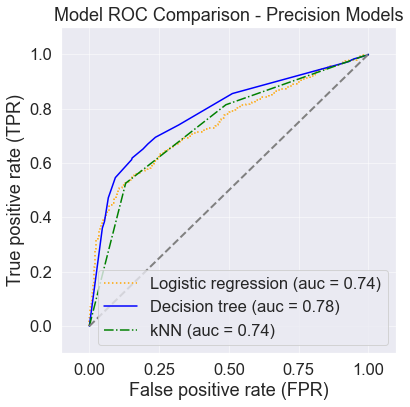

In [76]:
plt.figure(figsize=(6,6)) 
#LR
plot_ROC_curve(clf_lr_precision, label='Logistic regression', clr='orange', ls=':', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
#DT
plot_ROC_curve(clf_dt_precision, label='Decision tree', clr='blue', ls='-', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
#kNN
plot_ROC_curve(clf_kNN_precision, label='kNN', clr='green', ls='-.', X_train=X_std_train, X_test=X_std_test, y_train=y_train, y_test=y_test)

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Model ROC Comparison - Precision Models')

plt.show()

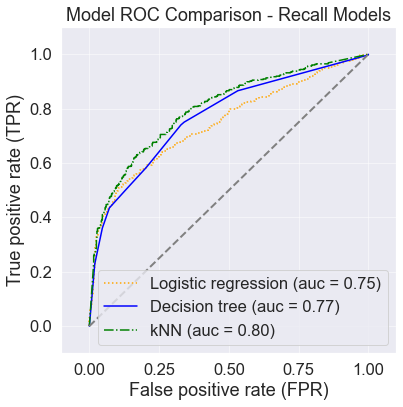

In [78]:
plt.figure(figsize=(6,6)) 
#LR
plot_ROC_curve(clf_lr_recall, label='Logistic regression', clr='orange', ls=':', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
#DT
plot_ROC_curve(clf_dt_recall, label='Decision tree', clr='blue', ls='-', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
#kNN
plot_ROC_curve(clf_kNN_recall, label='kNN', clr='green', ls='-.', X_train=X_std_train, X_test=X_std_test, y_train=y_train, y_test=y_test)

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Model ROC Comparison - Recall Models')

plt.show()

but ROC is some kind of combiniation of Precision and Recall. we want to evaluate precision and recall seperately

In [92]:
eval_cv = KFold(n_splits=10, shuffle=True,random_state = 42)

Text(0.5, 1.0, '10-Fold Performance Comparison - Precision Models')

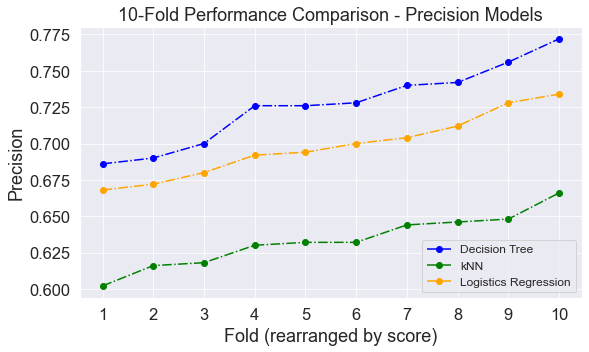

In [114]:
# 10 fold precision comparison

plt.figure(figsize=(9,5)) 
score_gs_dt_precision = cross_val_score(clf_dt_precision, X=X, y=y.ravel(), cv=eval_cv)
score_gs_dt_precision.sort()

score_gs_kNN_precision = cross_val_score(clf_kNN_precision, X=X, y=y.ravel(), cv=eval_cv)
score_gs_kNN_precision.sort()

score_gs_lr_precision = cross_val_score(clf_lr_precision, X=X, y=y.ravel(), cv=eval_cv)
score_gs_lr_precision.sort()

plt.plot(np.arange(1,11,1),score_gs_dt_precision, color='blue', label='Decision Tree', marker='o', ls='-.')
plt.plot(np.arange(1,11,1),score_gs_kNN_precision, color='green', label='kNN', marker='o', ls='-.')
plt.plot(np.arange(1,11,1),score_gs_lr_precision, color='orange', label='Logistics Regression', marker='o', ls='-.')

plt.legend(loc='lower right',fontsize=12)    # Where to place the legend

plt.grid(alpha=0.8)
plt.xlabel('Fold (rearranged by score)')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Precision')
plt.title('10-Fold Performance Comparison - Precision Models')

Text(0.5, 1.0, '10-Fold Performance Comparison - Recall Models')

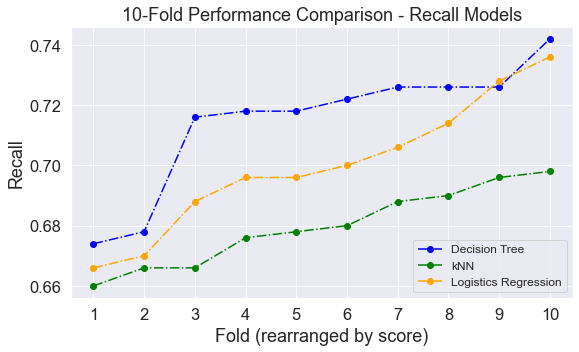

In [112]:
# 10 fold recall comparison

plt.figure(figsize=(9,5)) 
score_gs_dt_recall = cross_val_score(clf_dt_recall, X=X, y=y.ravel(), cv=eval_cv)
score_gs_dt_recall.sort()

score_gs_kNN_recall = cross_val_score(clf_kNN_recall, X=X, y=y.ravel(), cv=eval_cv)
score_gs_kNN_recall.sort()

score_gs_lr_recall = cross_val_score(clf_lr_recall, X=X, y=y.ravel(), cv=eval_cv)
score_gs_lr_recall.sort()

plt.plot(np.arange(1,11,1),score_gs_dt_recall, color='blue', label='Decision Tree', marker='o', ls='-.')
plt.plot(np.arange(1,11,1),score_gs_kNN_recall, color='green', label='kNN', marker='o', ls='-.')
plt.plot(np.arange(1,11,1),score_gs_lr_recall, color='orange', label='Logistics Regression', marker='o', ls='-.')

plt.legend(loc='lower right',fontsize=12)    # Where to place the legend

plt.grid(alpha=0.8)
plt.xlabel('Fold (rearranged by score)')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Recall')
plt.title('10-Fold Performance Comparison - Recall Models')

In [ ]:
# turns out kNN is the worst either for precision or recall
# also, we are interested in the probability of a data scientist changing his job
# but kNN can not return an effective probability prediction

In [79]:
clf_lr_precision.predict_proba(X_test)

array([[0.73069491, 0.26930509],
       [0.77783884, 0.22216116],
       [0.40624393, 0.59375607],
       ...,
       [0.81816633, 0.18183367],
       [0.20822791, 0.79177209],
       [0.7864792 , 0.2135208 ]])

In [80]:
clf_dt_precision.predict_proba(X_test)

array([[0.77568332, 0.22431668],
       [0.77568332, 0.22431668],
       [0.80487805, 0.19512195],
       ...,
       [0.77568332, 0.22431668],
       [0.21161826, 0.78838174],
       [0.77568332, 0.22431668]])

In [81]:
clf_kNN_precision.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

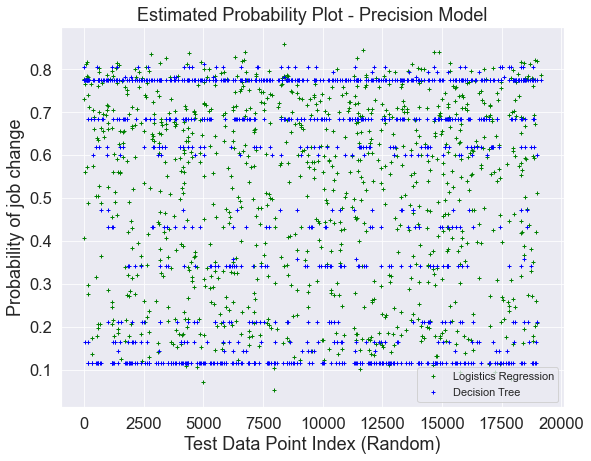

In [127]:
# further compare the probability estimation by DT and LR

plt.figure(figsize=(9,7)) 
prob_1 = []

for predict_proba in clf_lr_precision.fit(X_train, y_train).predict_proba(X_test):
     prob_1.append(predict_proba[0]) 
#prob_1.sort()
plt.plot(np.sort(X_test.index),
         np.array(prob_1),
         marker='+',markersize = 4,ls='',c="green",label="Logistics Regression")
prob_2 = []
#prob_2.sort()
for predict_proba in clf_dt_precision.fit(X_train, y_train).predict_proba(X_test):
     prob_2.append(predict_proba[0]) 
plt.plot(np.sort(X_test.index),
         np.array(prob_2),
         marker='+',markersize = 4,ls='',c="blue",label="Decision Tree")

plt.legend(loc='lower right',fontsize=11)
plt.grid(alpha=0.8)
plt.xlabel('Test Data Point Index (Random)')
plt.ylabel('Probability of job change')
plt.title('Estimated Probability Plot - Precision Model')
plt.show()

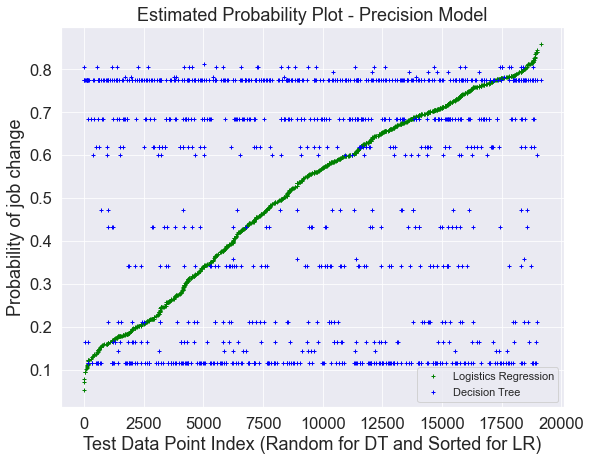

In [128]:
# when we sorted the dt probabilities...

plt.figure(figsize=(9,7)) 
prob_1 = []

for predict_proba in clf_lr_precision.fit(X_train, y_train).predict_proba(X_test):
     prob_1.append(predict_proba[0]) 
prob_1.sort()
plt.plot(np.sort(X_test.index),
         np.array(prob_1),
         marker='+',markersize = 4,ls='',c="green",label="Logistics Regression")
prob_2 = []
#prob_2.sort()
for predict_proba in clf_dt_precision.fit(X_train, y_train).predict_proba(X_test):
     prob_2.append(predict_proba[0]) 
plt.plot(np.sort(X_test.index),
         np.array(prob_2),
         marker='+',markersize = 4,ls='',c="blue",label="Decision Tree")

plt.legend(loc='lower right',fontsize=11)
plt.grid(alpha=0.8)
plt.xlabel('Test Data Point Index (Random for DT and Sorted for LR)')
plt.ylabel('Probability of job change')
plt.title('Estimated Probability Plot - Precision Model')
plt.show()